In [2]:
import numpy as np
import matplotlib.pyplot as plt
%run zadanie2_network.ipynb

## Bramka XOR
Wróćmy teraz do problemu bramki XOR z poprzedniego zestawu. Nie dało się go rozwiązać pojedynczym neuronem, ale można siecią złożoną z dwóch warstw.

## XOR gate
Let's now return to the problem of the XOR gate from the previous notebooks. It could not be solved with a single neuron, but it can be a network composed of two layers.

In [3]:
def network_XOR(network, learning_rate, steps):
    ### BEGIN SOLUTION
    for i in range(steps):
        in0 = int(np.random.uniform(0, 2))
        in1 = int(np.random.uniform(0, 2))
        out = network.forward(np.array((in0, in1)))
        error = (in0 + in1) % 2 - out #XOR
        network.backward(np.array((error)))
        network.learn(learning_rate)
    ### END SOLUTION


In [4]:
net_XOR = None
### BEGIN SOLUTION
net_XOR = Network(2)
net_XOR.addLayer(4)
net_XOR.addLayer(1)
network_XOR(net_XOR, 0.2, 40000)
### END SOLUTION

print(net_XOR.forward(np.array((0, 0))))
print(net_XOR.forward(np.array((0, 1))))
print(net_XOR.forward(np.array((1, 0))))
print(net_XOR.forward(np.array((1, 1))))
print(net_XOR.forward(np.array((0.5, 0.5))))

[0.03136596]
[0.97133622]
[0.96977992]
[0.03143979]
[0.97046872]


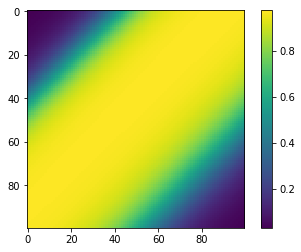

In [5]:
size = 100
tmp = np.zeros((size,size))
for i in range(size):
    for j in range(size):
        tmp[i][j] = net_XOR.forward(np.array((i / float(size), j / float(size))))
plt.imshow(tmp)
plt.colorbar()
plt.show()

In [6]:
np.testing.assert_equal(net_XOR.forward(np.array((0, 0)))[0] < 0.1, True)
np.testing.assert_equal(net_XOR.forward(np.array((1, 0)))[0] > 0.9, True)
np.testing.assert_equal(net_XOR.forward(np.array((0, 1)))[0] > 0.9, True)
np.testing.assert_equal(net_XOR.forward(np.array((1, 1)))[0] < 0.1, True)
out_mid = net_XOR.forward(np.array((0.5, 0.5)))[0]
np.testing.assert_equal(out_mid < 0.2 or out_mid > 0.8, True)